63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step
Confusion Matrix:
 [[ 196 1497]
 [   0  323]]
Balanced Accuracy: 0.5578854105138806
Precision: 0.17747252747252748


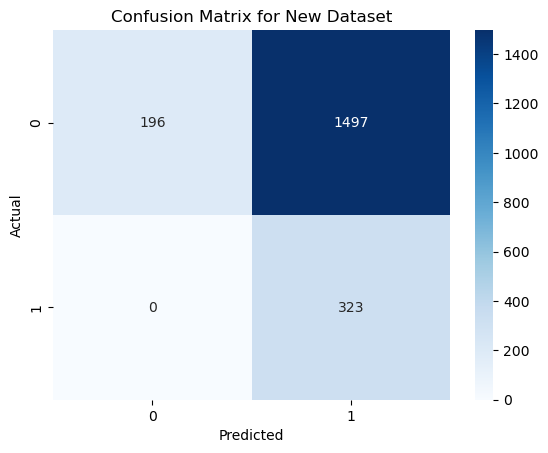

Number of samples: 2016
Model’s predictors: ['month', 'u10', 'v10', 'mx2t', 'mn2t', 'tcc', 't2', 'msl', 't', 'q', 'u', 'v', 'z']


In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model # type: ignore
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the new dataset
data = pd.read_csv('Climate_SPI1.csv')  # Replace with your new dataset file

data['Drought'] = data['SPI'].apply(lambda x: 1 if x < -1 else 0)

# Preprocessing: Apply the same transformations used during training
X_new = data.drop(columns=['year', 'grid_ID', 'SPI' ,'Drought'])  # Adjust based on your dataset
y_true_new = data['Drought']

# Assuming you already fitted a scaler on the training data and saved it
scaler = StandardScaler()

# Fit on the training data, then use it to transform new data (Ensure you have the correct scaler fitted)
X_new_scaled = scaler.fit_transform(X_new)  # Adjust this based on how you transformed training data

# Load the saved model
model = load_model('classification_model.h5')

# Predict on the new dataset
y_pred_new = (model.predict(X_new_scaled) > 0.5).astype('int32')

# Calculate confusion matrix, balanced accuracy, and precision
conf_matrix = confusion_matrix(y_true_new, y_pred_new)
balanced_acc = balanced_accuracy_score(y_true_new, y_pred_new)
precision = precision_score(y_true_new, y_pred_new)

# Print evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print("Balanced Accuracy:", balanced_acc)
print("Precision:", precision)

# Plot confusion matrix
# plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for New Dataset')
plt.show()

# Print number of samples and model’s predictor set
print(f"Number of samples: {len(X_new)}")
print(f"Model’s predictors: {X_new.columns.tolist()}")
